# **Checklist**

o que falta fazer: 

- construir gráficos para a análise desses dados
- ver se precisa tirar algum outlier (dados discrepantes ou inconsistentes) -> *acho que não precisa pq o outlier que tem é justamente no preço e nós não vamos usar essa coluna*
- transformação dos dados usando algum encoder (transformar categóricos em numéricos)
- dividir em treino e teste (em porcentagem, ex: 20 pra teste e 80 pra treino)
- previsão do preço
- regressão linear
- gráficos sobre os ultimos 2
- finalizar com comentários

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import csv
import plotly.express as px

In [8]:
df = pd.read_csv("/content/AB_NYC_2019.csv")
df

id  ... availability_365
0          2539  ...              365
1          2595  ...              355
2          3647  ...              365
3          3831  ...              194
4          5022  ...                0
...         ...  ...              ...
48890  36484665  ...                9
48891  36485057  ...               36
48892  36485431  ...               27
48893  36485609  ...                2
48894  36487245  ...               23

[48895 rows x 16 columns]

In [ ]:
df.sample(2)

id  ... availability_365
8626    6635985  ...              107
17885  14011728  ...                0

[2 rows x 16 columns]

In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.describe()

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Parte 1

**iremos fazer a previsão do preço a partir dos restantes dos dados**

previsão: price

colunas de base: 
  - neighbourhood_group, room_type *(categoricos)*
  - minimum_nights, number_of_reviews, reviews_per_month, availability_365 *(numéricos)*


  os dados categóricos teremos que transformar para numéricos
  não sei se todas essas colunas vão ser relevantes..falta analisar isso

# --- Preparação do Dataset ---

Vamos fazer uma limitação do dataset por conta de problemas encontrados enquanto fazíamos o homework, dessa forma, vamos limitar os dados por meio da data

In [11]:
filtro = (df['last_review'] >= '2019-01-01') & (df['last_review'] <= '2019-06-01')
df_filtro_2019 = df[filtro]

df_filtro_2019

id  ... availability_365
1          2595  ...              355
22         8025  ...              364
29         9657  ...               67
30         9668  ...              355
34        10452  ...              269
...         ...  ...              ...
45983  35013529  ...               88
46027  35035847  ...               31
46092  35069416  ...               68
46113  35085802  ...                0
46258  35167097  ...               70

[8145 rows x 16 columns]

Separando as colunas que iremos usar

In [13]:
df = df_filtro_2019[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365', 'price']]
df

neighbourhood_group        room_type  ...  availability_365  price
1               Manhattan  Entire home/apt  ...               355    225
22               Brooklyn     Private room  ...               364     80
29              Manhattan  Entire home/apt  ...                67    180
30              Manhattan     Private room  ...               355     50
34               Brooklyn     Private room  ...               269     70
...                   ...              ...  ...               ...    ...
45983            Brooklyn     Private room  ...                88     38
46027           Manhattan     Private room  ...                31    180
46092       Staten Island      Shared room  ...                68     30
46113              Queens     Private room  ...                 0     70
46258           Manhattan     Private room  ...                70    125

[8145 rows x 7 columns]

# --- Transformação dos Dados (novo) ---

In [20]:
X_df = df.iloc[:, 0:6].values
X_df

array([['Manhattan', 'Entire home/apt', 1, 45, 0.38, 355],
       ['Brooklyn', 'Private room', 1, 39, 0.37, 364],
       ['Manhattan', 'Entire home/apt', 14, 29, 0.24, 67],
       ...,
       ['Staten Island', 'Shared room', 4, 1, 0.77, 68],
       ['Queens', 'Private room', 1, 1, 0.68, 0],
       ['Manhattan', 'Private room', 21, 1, 0.79, 70]], dtype=object)

In [21]:
y_df = df.iloc[:, 6].values
y_df

array([225,  80, 180, ...,  30,  70, 125])

In [22]:
from sklearn.preprocessing import LabelEncoder
X_neighbourhood_group = LabelEncoder()
X_room_type = LabelEncoder()

In [23]:
X_df[:, 0] = X_neighbourhood_group.fit_transform(X_df[:, 0])
X_df[:, 1] = X_room_type.fit_transform(X_df[:, 1])

In [24]:
column_names = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365']
df_airbnb = pd.DataFrame(X_df, columns = column_names)

In [25]:
df_airbnb

neighbourhood_group room_type  ... reviews_per_month availability_365
0                      2         0  ...              0.38              355
1                      1         1  ...              0.37              364
2                      2         0  ...              0.24               67
3                      2         1  ...              2.04              355
4                      1         1  ...              0.66              269
...                  ...       ...  ...               ...              ...
8140                   1         1  ...               0.7               88
8141                   2         1  ...              0.77               31
8142                   4         2  ...              0.77               68
8143                   3         1  ...              0.68                0
8144                   2         1  ...              0.79               70

[8145 rows x 6 columns]

Dúvida: precisa padronizar isso aqui?

# --- Transformação dos Dados (antigo) ---

Transformar os dados categóricos em numéricos

In [ ]:
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

Tirando os dados NaN do last_review para diminuir a quantidade de bairros (tentativa)

In [ ]:
df.dropna(subset = ['last_review'], inplace = True)

In [ ]:
df.count()

id                                38843
name                              38837
host_id                           38843
host_name                         38827
neighbourhood_group               38843
neighbourhood                     38843
latitude                          38843
longitude                         38843
room_type                         38843
price                             38843
minimum_nights                    38843
number_of_reviews                 38843
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    38843
availability_365                  38843
dtype: int64

In [ ]:
df.dropna(subset = ['host_name'], inplace = True)

In [ ]:
df.count()

id                                38827
name                              38821
host_id                           38827
host_name                         38827
neighbourhood_group               38827
neighbourhood                     38827
latitude                          38827
longitude                         38827
room_type                         38827
price                             38827
minimum_nights                    38827
number_of_reviews                 38827
last_review                       38827
reviews_per_month                 38827
calculated_host_listings_count    38827
availability_365                  38827
dtype: int64

In [ ]:
df.dropna(subset = ['name'], inplace = True)

In [ ]:
df.count()

id                                38821
name                              38821
host_id                           38821
host_name                         38821
neighbourhood_group               38821
neighbourhood                     38821
latitude                          38821
longitude                         38821
room_type                         38821
price                             38821
minimum_nights                    38821
number_of_reviews                 38821
last_review                       38821
reviews_per_month                 38821
calculated_host_listings_count    38821
availability_365                  38821
dtype: int64

In [ ]:
df['neighbourhood_group'].nunique()

5

In [ ]:
len(np.unique(df['neighbourhood_group']))

5

In [ ]:
df['room_type'].nunique()

3

Restrigindo o data set para 01/01/2015 - 30/12/2019 

In [ ]:
filtro = (df['last_review'] >= '2019-01-01') & (df['last_review'] <= '2019-12-30')

df_filtro_2019 = df[filtro]
df_filtro_2019

id  ... availability_365
1          2595  ...              355
3          3831  ...              194
5          5099  ...              129
7          5178  ...              220
9          5238  ...              188
...         ...  ...              ...
48782  36425863  ...              147
48790  36427429  ...              339
48799  36438336  ...               87
48805  36442252  ...               40
48852  36455809  ...                1

[25201 rows x 16 columns]

--- OneHotEncoder ---

In [ ]:
df_filtro = df_filtro_2019[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365', 'price']]
df_filtro


neighbourhood_group        room_type  ...  availability_365  price
1               Manhattan  Entire home/apt  ...               355    225
3                Brooklyn  Entire home/apt  ...               194     89
5               Manhattan  Entire home/apt  ...               129    200
7               Manhattan     Private room  ...               220     79
9               Manhattan  Entire home/apt  ...               188    150
...                   ...              ...  ...               ...    ...
48782           Manhattan     Private room  ...               147    129
48790              Queens     Private room  ...               339     45
48799       Staten Island     Private room  ...                87    235
48805               Bronx  Entire home/apt  ...                40    100
48852            Brooklyn     Private room  ...                 1     30

[25201 rows x 7 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ohe = (ColumnTransformer(
    transformers = [('OneHot', OneHotEncoder(), [0, 1])], # neighbourhood_group e room_type = dados categoricos
    remainder = 'passthrough'
))

In [ ]:
# usando o onehotencoder

#X_df = ohe.fit_transform(X_df).toarray()

--- Label Encoder --- 

In [ ]:
X_df = df_filtro.iloc[:, 0:6].values
X_df

array([['Manhattan', 'Entire home/apt', 1, 45, 0.38, 355],
       ['Brooklyn', 'Entire home/apt', 1, 270, 4.64, 194],
       ['Manhattan', 'Entire home/apt', 3, 74, 0.59, 129],
       ...,
       ['Staten Island', 'Private room', 1, 1, 1.0, 87],
       ['Bronx', 'Entire home/apt', 1, 2, 2.0, 40],
       ['Brooklyn', 'Private room', 1, 1, 1.0, 1]], dtype=object)

In [ ]:
X_df[0]

array(['Manhattan', 'Entire home/apt', 1, 45, 0.38, 355], dtype=object)

In [ ]:
y_df = df_filtro.iloc[:, 6].values
y_df

array([225,  89, 200, ..., 235, 100,  30])

In [ ]:
y_df[0]

225

In [ ]:
from sklearn.preprocessing import LabelEncoder
X_neighbourhood_group = LabelEncoder()
X_room_type = LabelEncoder()

In [ ]:
X_df[:, 0] = X_neighbourhood_group.fit_transform(X_df[:, 0])
X_df[:, 1] = X_room_type.fit_transform(X_df[:, 1])

X_df

array([[2, 0, 1, 45, 0.38, 355],
       [1, 0, 1, 270, 4.64, 194],
       [2, 0, 3, 74, 0.59, 129],
       ...,
       [4, 1, 1, 1, 1.0, 87],
       [0, 0, 1, 2, 2.0, 40],
       [1, 1, 1, 1, 1.0, 1]], dtype=object)

In [ ]:
X_df[0]

array([2, 0, 1, 45, 0.38, 355], dtype=object)

**PERGUNTAR PRA PROFESSORA SE PRECISA PADRONIZAR OS DADOS DEPOIS DA TRANSFORMAÇÃO DO DATAFRAME PADRÃO PARA O DATAFRAME AIRBNB**

In [ ]:
column_names = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365']
airbnb = pd.DataFrame(X_df, columns = column_names)

In [ ]:
airbnb

neighbourhood_group room_type  ... reviews_per_month availability_365
0                       2         0  ...              0.38              355
1                       1         0  ...              4.64              194
2                       2         0  ...              0.59              129
3                       2         1  ...              3.47              220
4                       2         0  ...              1.33              188
...                   ...       ...  ...               ...              ...
25196                   2         1  ...                 1              147
25197                   3         1  ...                 1              339
25198                   4         1  ...                 1               87
25199                   0         0  ...                 2               40
25200                   1         1  ...                 1                1

[25201 rows x 6 columns]

In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  25201 non-null  object
 1   room_type            25201 non-null  object
 2   minimum_nights       25201 non-null  object
 3   number_of_reviews    25201 non-null  object
 4   reviews_per_month    25201 non-null  object
 5   availability_365     25201 non-null  object
dtypes: object(6)
memory usage: 1.2+ MB


--- OneHotEncoder ---

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

In [ ]:
#ohe = (ColumnTransformer(
    #transformers = [('OneHot', OneHotEncoder(), [0, 1])], # neighbourhood_group e room_type
    #remainder = 'passthrough'
#))

In [ ]:
# usando o onehotencoder

#X_df = ohe.fit_transform(X_df).toarray()

Treino e Teste

In [ ]:
# train e test
#from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=1)

In [ ]:
# padronizar os dados

#from sklearn.preprocessing import StandardScaler
#df_scaler = StandardScaler()
#X_train = df_scaler.fit_transform(X_train)
#X_test = df_scaler.transform(X_test)

In [ ]:
#X_train

In [ ]:
# salvar esse Encoder pra não ter que fazer isso sempre:

#import pickle
#with open('price_prediction.pkl', 'wb') as f:
  #pickle.dump([X_train, X_test, Y_train, Y_test], f)

**4**

Perform a multi-variate analysis of the predictors. Specifically, you must perform a
principal components analysis of the predictors, retain only the first two principal
components (those associated with the two largest eigenvalues) and plot the scatter
plot of the projected observations.

Site de inspiração: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

https://leandrocruvinel.medium.com/pca-na-mão-e-no-python-d559e9c8f053


Primeiro é necessário subtrair a média pois a pca é bastante sensível a escala


In [ ]:
airbnb

neighbourhood_group room_type  ... reviews_per_month availability_365
0                       2         0  ...              0.38              355
1                       1         0  ...              4.64              194
2                       2         0  ...              0.59              129
3                       2         1  ...              3.47              220
4                       2         0  ...              1.33              188
...                   ...       ...  ...               ...              ...
25196                   2         1  ...                 1              147
25197                   3         1  ...                 1              339
25198                   4         1  ...                 1               87
25199                   0         0  ...                 2               40
25200                   1         1  ...                 1                1

[25201 rows x 6 columns]

In [ ]:
airbnb_normalized = airbnb - airbnb.mean()
airbnb_normalized

neighbourhood_group room_type  ... reviews_per_month availability_365
0                 0.31225 -0.497044  ...          -1.59383          208.606
1                -0.68775 -0.497044  ...           2.66617          47.6062
2                 0.31225 -0.497044  ...          -1.38383         -17.3938
3                 0.31225  0.502956  ...           1.49617          73.6062
4                 0.31225 -0.497044  ...         -0.643832          41.6062
...                   ...       ...  ...               ...              ...
25196             0.31225  0.502956  ...         -0.973832         0.606246
25197             1.31225  0.502956  ...         -0.973832          192.606
25198             2.31225  0.502956  ...         -0.973832         -59.3938
25199            -1.68775 -0.497044  ...         0.0261676         -106.394
25200            -0.68775  0.502956  ...         -0.973832         -145.394

[25201 rows x 6 columns]

Agora devemos calcular a matrix de covariancia

In [ ]:
for i in range(0, len(airbnb_normalized.columns)):
    airbnb_normalized.iloc[:,i] = pd.to_numeric(airbnb_normalized.iloc[:,i], errors='ignore')
covMatrix = np.cov(airbnb_normalized,rowvar = False)
covMatrix

array([[ 6.07853515e-01,  7.43005600e-03,  6.53204758e-02,
        -1.27065900e-01,  9.76530579e-02,  5.82981952e+00],
       [ 7.43005600e-03,  2.96588483e-01, -5.18533152e-01,
         3.11398052e-01,  5.05982346e-02,  3.65586646e+00],
       [ 6.53204758e-02, -5.18533152e-01,  1.08359491e+02,
        -6.16735312e+01, -3.73313934e+00,  1.19801019e+02],
       [-1.27065900e-01,  3.11398052e-01, -6.16735312e+01,
         3.05921054e+03,  4.64330648e+01,  8.22325076e+02],
       [ 9.76530579e-02,  5.05982346e-02, -3.73313934e+00,
         4.64330648e+01,  3.22785612e+00,  8.09546354e+00],
       [ 5.82981952e+00,  3.65586646e+00,  1.19801019e+02,
         8.22325076e+02,  8.09546354e+00,  1.61590117e+04]])

In [ ]:
autovalores, autovetores = np.linalg.eig(covMatrix)

autovalores

array([1.62112723e+04, 3.01013502e+03, 1.05960290e+02, 2.45385125e+00,
       6.00178302e-01, 2.92402106e-01])

In [ ]:
df

id  ... availability_365
0          2539  ...              365
1          2595  ...              355
3          3831  ...              194
4          5022  ...                0
5          5099  ...              129
...         ...  ...              ...
48782  36425863  ...              147
48790  36427429  ...              339
48799  36438336  ...               87
48805  36442252  ...               40
48852  36455809  ...                1

[38821 rows x 16 columns]

**Question:**

Are the data well (or better) separated? What predictors show a high degree of overlapand thus are harder to separate?

Better separeted = desejamos tirar preditores que possuem correlações, dados melhor separados significa dados com pouca correlação, para ter o máximo de informação com a menor quantidade de dados

**R:**



# --- Data Analysis --- 

1. Define the goal of your goal and identify the output Y of your predictive model.
Describe your data and their features in terms of number of observations N, number
of predictor variables D. Make sure that predictors are numerical, not categorical.

**R:**

Objetivo: prever o preço a partir das outras colunas do nosso dataset;

Descrição: São 48895 análises (antes da limpeza dos dados), iremos utilizar a coluna price para as previsões e as colunas neighbourhood_group, neighbourhood room_type (categoricos) e minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365 (numéricos), as quais iremos utilizar a transformação para categóricos virarem numéricos, totalizando 8 colunas de previsores.

2. Perform a mono-variate analysis of each of the D predictors. Specifically, you must
plot their histogram, calculate their mean µd, standard deviation σd and skewness γd,
with d = 1, . . . , D, using all the N observations

**R:**

Achando o mean e o deviation>

In [ ]:
df.describe()

id  ...  availability_365
count  3.882100e+04  ...      38821.000000
mean   1.810081e+07  ...        114.886299
std    1.069372e+07  ...        129.529950
min    2.539000e+03  ...          0.000000
25%    8.721444e+06  ...          0.000000
50%    1.887286e+07  ...         55.000000
75%    2.756746e+07  ...        229.000000
max    3.645581e+07  ...        365.000000

[8 rows x 10 columns]

In [ ]:
airbnb.describe()

neighbourhood_group  room_type  ...  reviews_per_month  availability_365
count                 25201      25201  ...            25201.0             25201
unique                    5          3  ...              936.0               366
top                       1          0  ...                1.0                 0
freq                  10464      13262  ...              882.0              3086

[4 rows x 6 columns]

In [ ]:
airbnb['minimum_nights'].mean()

4.898853220110313

Descobrindo o skewness

In [ ]:
df.skew(axis = 0)

id                                -0.071215
host_id                            1.247960
latitude                           0.272518
longitude                          1.256266
price                             23.673594
minimum_nights                    27.542187
number_of_reviews                  3.325293
reviews_per_month                  3.131563
calculated_host_listings_count    10.628207
availability_365                   0.723218
dtype: float64

Pegando um valor que é necessário pra questão

In [ ]:
df['reviews_per_month'].mean()

1.373229180082972

In [ ]:
df['reviews_per_month'].std()

1.6803277675005772

In [ ]:
df['calculated_host_listings_count'].mean()

5.16661085494964

Plotando os histogramas dos previsores:

In [ ]:
plt.style.use('seaborn-darkgrid')

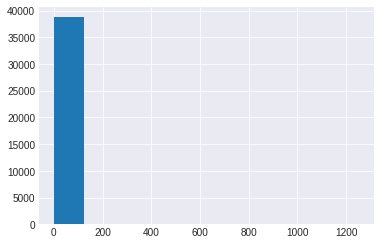

In [ ]:
plt.hist(x = df['minimum_nights']);

In [ ]:
# esse grafico aqui é mais detalhado do que o hist acima ("mais aberto")

plot = px.histogram(df, x = "minimum_nights")
plot.show()

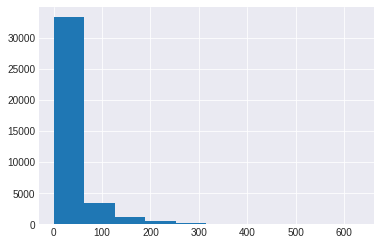

In [ ]:
plt.hist(x = df['number_of_reviews']);

In [ ]:
plot = px.histogram(df, x = 'number_of_reviews')
plot.show()

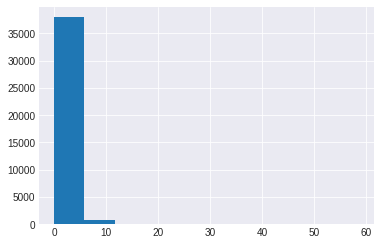

In [ ]:
plt.hist(x = df['reviews_per_month']);

In [ ]:
plot = px.histogram(df, x = 'reviews_per_month')
plot.show()

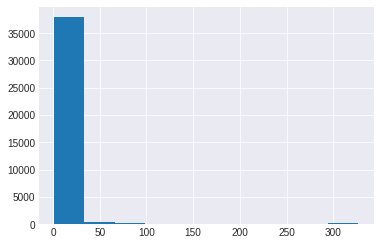

In [ ]:
plt.hist(x = df['calculated_host_listings_count']);

In [ ]:
plot = px.histogram(df, x = 'calculated_host_listings_count')
plot.show()

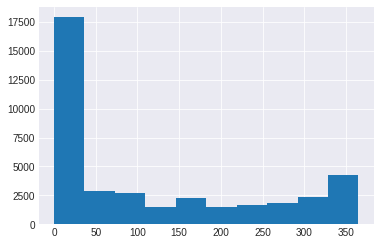

In [ ]:
plt.hist(x = df['availability_365']);

In [ ]:
plot = px.histogram(df , x= 'availability_365')
plot.show()

3. Perform a bi-variate analysis of the predictors. Specifically, you must plot the scatter
plots between all pairs of predictors. Investigate the existence of potential relationships
between pairs of predictors and the presence of potential outliers

previsores: minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['minimum_nights', 'number_of_reviews'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['minimum_nights', 'reviews_per_month'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['minimum_nights', 'calculated_host_listings_count'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['minimum_nights', 'availability_365'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['number_of_reviews', 'reviews_per_month'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['number_of_reviews', 'calculated_host_listings_count'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['number_of_reviews', 'availability_365'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['reviews_per_month', 'calculated_host_listings_count'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['reviews_per_month', 'availability_365'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['calculated_host_listings_count', 'availability_365'], color = 'host_id')
plot.show()

**3.2**

Are there any relevant relationships between pairs of predictors? If yes, are these relationships
linear? Quantify linear dependence between predictors using pair-wise correlation
coefficients $\rho d_1, \rho d_j $ , with di; dj = 1,...,D. Either tabulate the correlation coefficients as a
correlation matrix, or show the matrix as an image. Comment on the results.


**R:** 

Sim, notamos que existem relações entre diversos preditores, como exemplo, entre numeros minimo de noites e numeros de reviews, numero de reviews e numero de reviews mês.



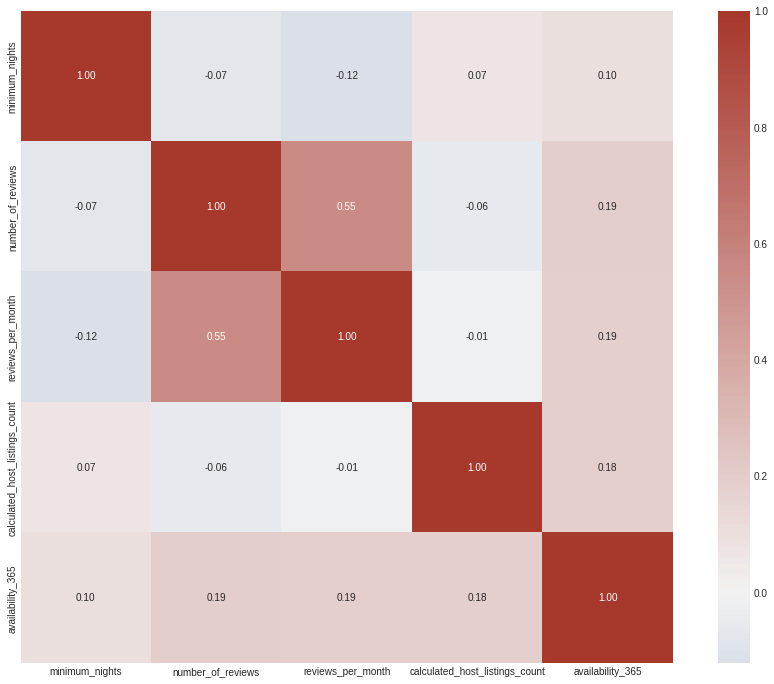

In [ ]:
df_aux = df[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

matrix = df_aux.corr(method ='pearson')

plt.figure(figsize=(16,12))

cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

Vemos que existe uma relação moderada entre número de reviews por mês e número de reviews 0.3 $\leq$ |r| $<$0.7 e as outras relações são fracas 0.0 $\leq$ |r| $<$0.3

# --- Limpeza dos Dados ---

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

In [ ]:
# checagem de valores nulos no df
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# retirando os valores nulos para a coluna 'name'

df.dropna(subset = ['name'], inplace = True) # o inplace é pra garantir que o df atualize os dados substituídos
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# retirando os valores nulos para a coluna 'host_name'

df.dropna(subset = ['host_name'], inplace = True)
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# análise dos valores nulos para number_of_reviews
df.loc[df['number_of_reviews'] == 0].head()

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

In [ ]:
# substituindo os valores NaN da coluna reviews_per_month para 0

df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

In [ ]:
# fazendo a checagem apos a limpeza

df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
# tirando valores duplicados

df.drop_duplicates()

id  ... availability_365
0          2539  ...              365
1          2595  ...              355
3          3831  ...              194
4          5022  ...                0
5          5099  ...              129
...         ...  ...              ...
48782  36425863  ...              147
48790  36427429  ...              339
48799  36438336  ...               87
48805  36442252  ...               40
48852  36455809  ...                1

[38821 rows x 16 columns]

In [ ]:
# contagem final dos dados apos a limpeza

df

id  ... availability_365
0          2539  ...              365
1          2595  ...              355
3          3831  ...              194
4          5022  ...                0
5          5099  ...              129
...         ...  ...              ...
48782  36425863  ...              147
48790  36427429  ...              339
48799  36438336  ...               87
48805  36442252  ...               40
48852  36455809  ...                1

[38821 rows x 16 columns]

In [ ]:
df.info() # last_review não precisa resolver o problema da coluna pq nao iremos usar na previsão

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

# Linear Regression